$E = U = kx^2/2$

$exp(\frac{-(E'-E)}{KBT}) = exp(-\frac{(x'^2-x^2)}{2})$


E(x)= -0.0006237955951524148
E(x^2)= 0.9993062693510789
E(x^3)= -0.012969195066724164
E(x^4)= 3.021054660576612


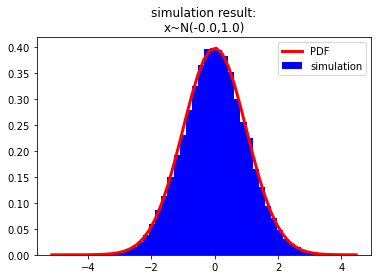

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.optimize import curve_fit
from scipy.stats import norm


def PDF(x2,x1):
    return math.exp(-(x2**2-x1**2)/2)

seq = [3]
seq_2 = [9]
seq_3 = [27]
seq_4 = [81]
time = 200000
for i in range(time):
    nex = random.uniform(seq[-1]-4,seq[-1]+4)
    if abs(nex)-abs(seq[-1])<=0:
        seq.append(nex)
        seq_2.append(nex**2)
        seq_3.append(nex**3)
        seq_4.append(nex**4)
    else:
        r = random.random()
        if r<PDF(nex,seq[-1]):
            seq.append(nex)
            seq_2.append(nex**2)
            seq_3.append(nex**3)
            seq_4.append(nex**4)
        else:
            seq.append(seq[-1])
            seq_2.append(seq[-1]**2)
            seq_3.append(seq[-1]**3)
            seq_4.append(seq[-1]**4)
        

mean = sum(seq)/(time+1)
mean_2 = sum(seq_2)/(time+1)

mean_3 = sum(seq_3)/(time+1)


mean_4 = sum(seq_4)/(time+1)


print("E(x)=",mean)  
print("E(x^2)=",mean_2)
print("E(x^3)=",mean_3)
print("E(x^4)=",mean_4)



(mu,sigma) = norm.fit(seq)

n,bins,apatches=plt.hist(seq,50,density = True,color = 'b',label = 'simulation')
x = norm.pdf(bins,0,1)
plt.plot(bins,x,lw = 3, c='r',label ='PDF')
plt.legend()
plt.title(f'simulation result:\nx~N({round(mu,2)},{round(sigma**2,2)})')
plt.show()